<div class="alert alert-block alert-success">
    <b><center>CNN Basic Examples</center></b>
    <b><center>RSNET</center></b>
</div>

# Configure Learning Environment

In [1]:
# !pip install git+https://github.com/nockchun/rspy --force
# !pip install mybatis_mapper2sql
import rspy as rsp
rsp.setSystemWarning(off=True)
rsp.fixMemoryProblem()

1 Physical GPUs, 1 Logical GPUs


In [2]:
import numpy as np
from ipywidgets import interact
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
import tensorflow as tf
from tensorflow.keras import utils, layers, activations, models, losses, optimizers, metrics, callbacks, datasets, preprocessing

In [4]:
tf.__version__

'2.4.1'

# CIFAR10 Dataset
The CIFAR10 dataset contains 60,000 color images in 10 classes, with 6,000 images in each class. The dataset is divided into 50,000 training images and 10,000 testing images. The classes are mutually exclusive and there is no overlap between them.

In [5]:
# Download the mnist dataset using keras
(train_data, train_label), (test_data, test_label) = datasets.cifar10.load_data()
train_data.shape, train_label.shape, test_data.shape, test_label.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [6]:
# Counting unique value of train data
unique, counts = np.unique(train_label, return_counts=True)
num_labels = len(unique)
f"Train labels: {dict(zip(unique, counts))}"

'Train labels: {0: 5000, 1: 5000, 2: 5000, 3: 5000, 4: 5000, 5: 5000, 6: 5000, 7: 5000, 8: 5000, 9: 5000}'

# Preprocessing

In [7]:
# Normalizing
train_data_proc = train_data / 255
test_data_proc = test_data / 255

#One hot encoding
train_label_proc = utils.to_categorical(train_label, 10)
test_label_proc = utils.to_categorical(test_label, 10)

In [8]:
image_gen = preprocessing.image.ImageDataGenerator(
    width_shift_range=0.3,
    height_shift_range=0.3,
    horizontal_flip=True,
    rotation_range=20,
    shear_range=0.05,
    zoom_range=0.3
)
train_gen = image_gen.flow(train_data_proc, train_label_proc, batch_size=128)

# Create Model

In [9]:
mInput = layers.Input((32, 32, 3))

In [10]:
mB1 = layers.Conv2D(128, 3, padding="same", activation="relu", name="B1_Conv_1")(mInput)
mB1 = layers.BatchNormalization(name="B1_Norm_1")(mB1)
mB1 = layers.Conv2D(128, 3, padding="same", activation="relu", name="B1_Conv_2")(mB1)
mB1 = layers.BatchNormalization(name="B1_Norm_2")(mB1)
mB1 = layers.MaxPool2D(2, strides=1, name="B1_Pool")(mB1)
mB1 = layers.Dropout(0.5, name="B1_Drop")(mB1)

In [11]:
mB2 = layers.Conv2D(128, 3, padding="same", activation="relu", name="B2_Conv_1")(mB1)
mB2 = layers.BatchNormalization(name="B2_Norm_1")(mB2)
mB2 = layers.Conv2D(256, 3, dilation_rate=2, activation="relu", name="B2_Conv_2")(mB2)
mB2 = layers.BatchNormalization(name="B2_Norm_2")(mB2)
mB2 = layers.MaxPool2D(2, strides=1, name="B2_Pool")(mB2)
mB2 = layers.Dropout(0.5, name="B2_Drop")(mB2)

In [12]:
mB3     = layers.Conv2D(256, 3, padding="same", activation="relu", name="B3_Conv_1")(mB2)
mB3     = layers.BatchNormalization(name="B3_Norm_1")(mB3)
mB3     = layers.Conv2D(512, 3, padding="same", dilation_rate=2, activation="relu", name="B3_Conv_2")(mB3)
mB3     = layers.BatchNormalization(name="B3_Norm_2")(mB3)
mB3Pool = layers.MaxPool2D(2, strides=1, name="B3_Pool")(mB3)
mB3     = layers.Dropout(0.5, name="B3_Drop")(mB3Pool)

In [13]:
mB4     = layers.Conv2D(256, 3, padding="same", activation="relu", name="B4_Conv_1")(mB3)
mB4     = layers.BatchNormalization(name="B4_Norm_1")(mB4)
mB4     = layers.Conv2D(512, 3, padding="same", activation="relu", name="B4_Conv_2")(mB4)
mB4     = layers.add([mB4, mB3Pool], name="B4_Add")
mB4Nor  = layers.BatchNormalization(name="B4_Norm_2")(mB4)
mB4Dout = layers.Dropout(0.5, name="B4_Drop")(mB4Nor)

In [14]:
mB5 = layers.Conv2D(256, 3, dilation_rate=2, padding="same", activation="relu", name="B5_Conv_1")(mB4Nor)
mB5 = layers.BatchNormalization(name="B5_Norm")(mB5)
mB5 = layers.Conv2D(512, 3, dilation_rate=3, padding="same", activation="relu", name="B5_Conv_2")(mB5)

In [15]:
mB6 = layers.Conv2D(256, 5, padding="same", activation="relu", name="B6_Conv_1")(mB4Nor)
mB6 = layers.BatchNormalization(name="B6_Norm")(mB6)
mB6 = layers.Conv2D(512, 5, padding="same", activation="relu", name="B6_Conv_2")(mB6)

In [16]:
mB7 = layers.Conv2D(256, 3, padding="same", activation="relu", name="B7_Conv_1")(mB4Dout)
mB7 = layers.BatchNormalization(name="B7_Norm_1")(mB7)
mB7 = layers.Conv2D(512, 3, padding="same", activation="relu", name="B7_Conv_2")(mB7)
mB7 = layers.add([mB5, mB6, mB7], name="B7_Add")
mB7 = layers.BatchNormalization(name="B7_Norm_2")(mB7)
mB7 = layers.Dropout(0.5, name="B7_Drop")(mB7)

In [17]:
mB8 = layers.Conv2D(256, 3, padding="same", activation="relu", name="B8_Conv_1")(mB7)
mB8 = layers.BatchNormalization(name="B8_Norm_1")(mB8)
mB8 = layers.Conv2D(512, 3, padding="same", dilation_rate=2, activation="relu", name="B8_Conv_2")(mB8)
mB8 = layers.add([mB3Pool, mB5, mB7, mB8], name="B8_Add")
mB8 = layers.BatchNormalization(name="B8_Norm_2")(mB8)
mB8 = layers.Dropout(0.5, name="B8_Drop")(mB8)

In [18]:
mB9 = layers.Conv2D(512, 3, activation="relu", name="B9_Conv_1")(mB8)
mB9 = layers.BatchNormalization(name="B9_Norm_1")(mB9)
mB9 = layers.Conv2D(512, 3, dilation_rate=2, activation="relu", name="B9_Conv_2")(mB9)
mB9 = layers.BatchNormalization(name="B9_Norm_2")(mB9)
mB9 = layers.MaxPool2D(2, name="B9_Pool")(mB9)
mB9 = layers.Dropout(0.5, name="B9_Drop")(mB9)

In [19]:
mB10 = layers.Conv2D(1024, 3, padding="same", activation="relu", name="B8_Conv")(mB9)
mB10 = layers.GlobalAveragePooling2D(name="B10_Pool")(mB10)
mB10 = layers.BatchNormalization(name="B10_Norm")(mB10)

In [20]:
mOutput = layers.Dense(10, activation="softmax", name="Output")(mB10)

In [21]:
model = models.Model(mInput, mOutput)
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
B1_Conv_1 (Conv2D)              (None, 32, 32, 128)  3584        input_1[0][0]                    
__________________________________________________________________________________________________
B1_Norm_1 (BatchNormalization)  (None, 32, 32, 128)  512         B1_Conv_1[0][0]                  
__________________________________________________________________________________________________
B1_Conv_2 (Conv2D)              (None, 32, 32, 128)  147584      B1_Norm_1[0][0]                  
______________________________________________________________________________________________

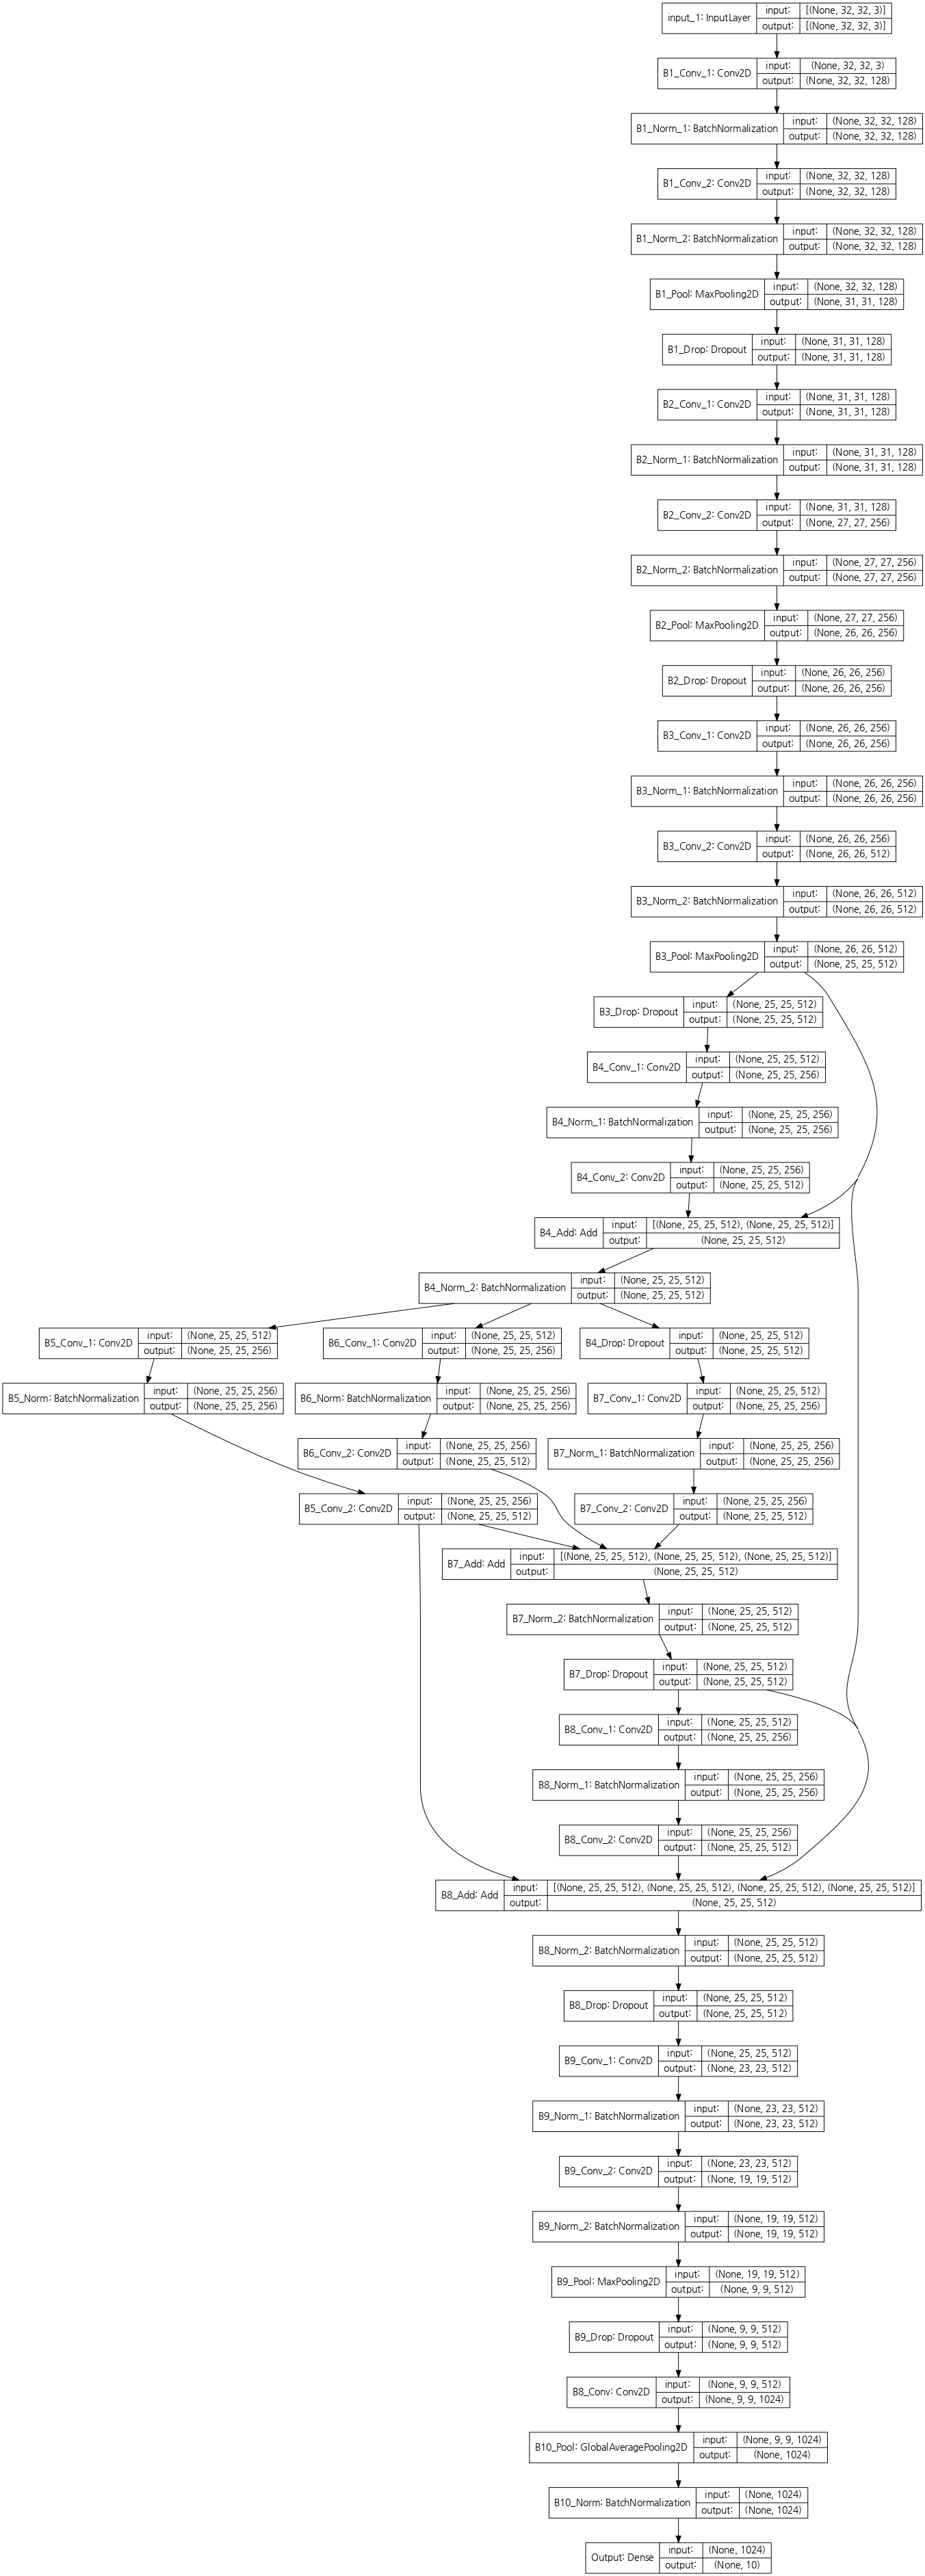

In [22]:
utils.plot_model(model, "intermediate/model.png", True, dpi=70)

In [23]:
model.compile(
    loss=losses.CategoricalCrossentropy(),
    optimizer=optimizers.Adadelta(),
    metrics=[metrics.CategoricalAccuracy()],
)

In [24]:
history_aug = model.fit(
    train_gen,
    validation_data=(test_data_proc, test_label_proc),
    epochs=100
)

Epoch 1/100


ResourceExhaustedError:  OOM when allocating tensor with shape[1152,11,11,256] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[node model/B5_Conv_2/Conv2D/SpaceToBatchND (defined at <ipython-input-24-8c078f026919>:1) ]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.
 [Op:__inference_train_function_4877]

Function call stack:
train_function


In [ ]:
pd.DataFrame(history_aug.history).plot()

# Predict

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

@interact(idx=(0, 9999, 1))
def showTestImage(idx):
    data = test_data[idx].reshape(-1, 32, 32, 3)/255
    dataPred = model.predict(data)
    
    plt.imshow(test_data[idx])
    plt.grid(False)
    plt.title(f"LABEL: {class_names[test_label[idx][0]]}, PREDICT: {class_names[np.argmax(dataPred)]}")
    plt.show()

# Error Find

In [ ]:
err_idx = []
pred_result = model.predict(test_data_proc)

for idx in range(10000):
    if np.argmax(pred_result[idx]) != test_label[idx][0]:
        err_idx.append(idx)

In [ ]:
len(err_idx), err_idx